# Baby Names Project
Analyzing popular baby names of the US from 1880 to 2022

In [82]:
# data from: https://www.ssa.gov/oact/babynames/limits.html
import pandas as pd
import numpy as np


DATA_LOCATION = 'C:/Users/carlo/Desktop/projects/Data Practice/BabyNames'

pieces = []
for year in range(1880, 2023):
    path = DATA_LOCATION + f'/yob{year}.txt'
    df_baby_names = pd.read_csv(path, names=['name', 'sex', 'births'])
    df_baby_names['year'] = year
    pieces.append(df_baby_names)

names = pd.concat(pieces, ignore_index=True)
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

names.tail()



,name,sex,births,year
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022
2085157,Zymeire,M,5,2022


<Axes: title={'center': 'Total births'}, xlabel='year'>

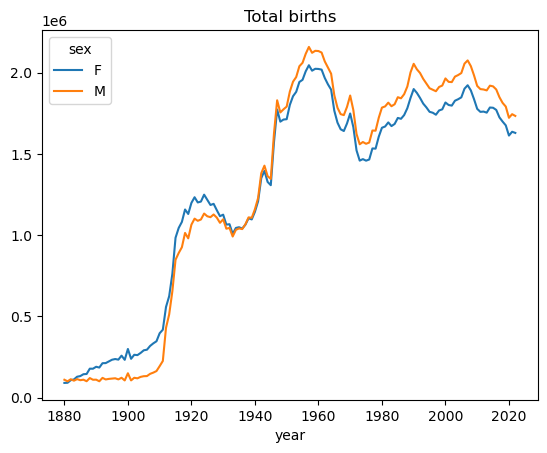

In [58]:
total_births.plot(title = 'Total births')

In [83]:
def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

names = names.groupby(['sex', 'year'], as_index=False).apply(add_prop)

names

name sex  births  year      prop
0   0             Mary   F    7065  1880  0.077642
    1             Anna   F    2604  1880  0.028617
    2             Emma   F    2003  1880  0.022012
    3        Elizabeth   F    1939  1880  0.021309
    4           Minnie   F    1746  1880  0.019188
...                ...  ..     ...   ...       ...
285 2085153     Zuberi   M       5  2022  0.000003
    2085154       Zydn   M       5  2022  0.000003
    2085155      Zylon   M       5  2022  0.000003
    2085156     Zymeer   M       5  2022  0.000003
    2085157    Zymeire   M       5  2022  0.000003

[2085158 rows x 5 columns]

In [84]:
names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

In [85]:
def get_top1000(group):
    return group.sort_values('births', ascending = False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000).reset_index(drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 1880 to 2022
Columns: 7322 entries, Aaden to Zyon
dtypes: float64(7322)
memory usage: 8.0 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

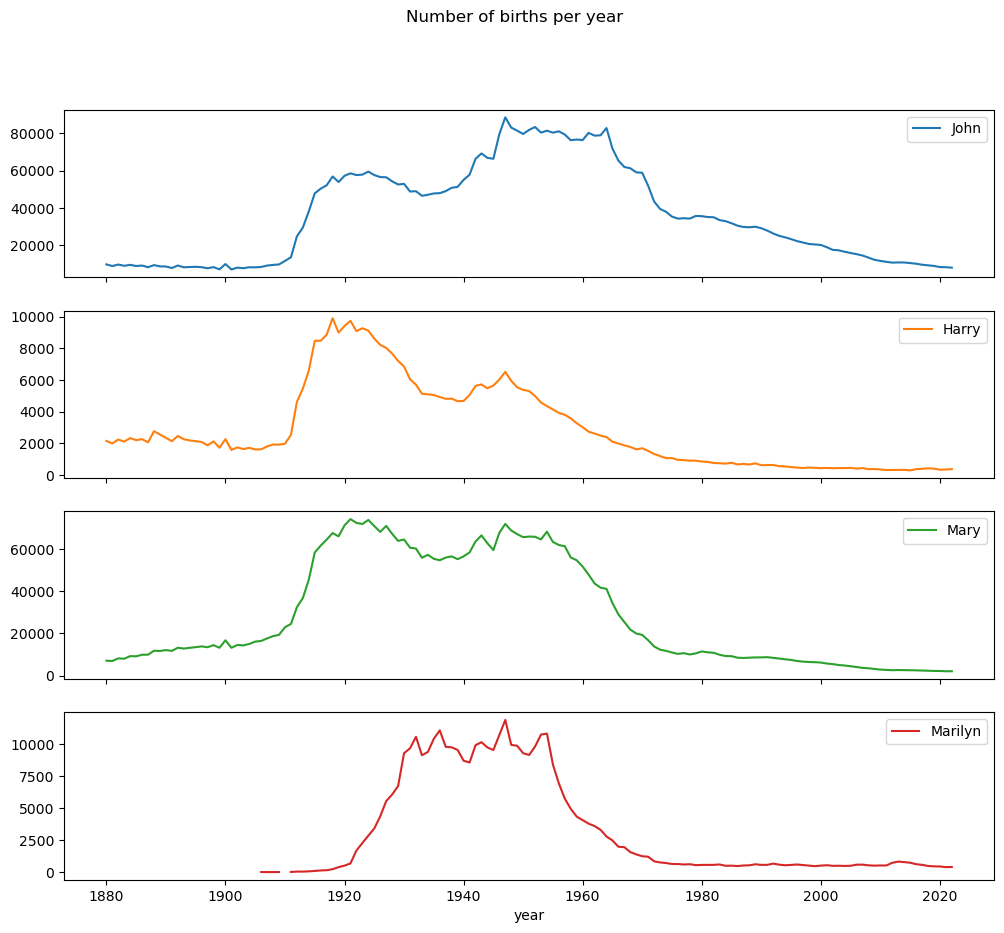

In [86]:
boys = top1000[top1000['sex']=='M']

girls = top1000[top1000['sex'] == 'F']

total_births = top1000.pivot_table('births', index='year', columns= 'name', aggfunc=sum)

total_births.info()

subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), title='Number of births per year')

<Axes: title={'center': 'Sum of table100.prop by year and sex'}, xlabel='year'>

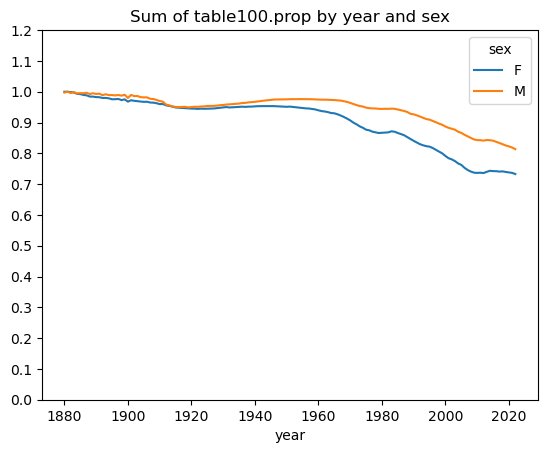

In [87]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.plot(title='Sum of table100.prop by year and sex', yticks = np.linspace(0, 1.2, 13))

In [88]:
df = boys[boys['year'] == 2010]
df

,name,sex,births,year,prop
260876,Jacob,M,22144,2010,0.011547
260877,Ethan,M,18011,2010,0.009392
260878,Michael,M,17374,2010,0.009059
260879,Jayden,M,17192,2010,0.008964
260880,William,M,17064,2010,0.008898
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [89]:
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

260876    0.011547
260877    0.020938
260878    0.029998
260879    0.038962
260880    0.047860
260881    0.056599
260882    0.065186
260883    0.073454
260884    0.081559
260885    0.089643
Name: prop, dtype: float64

In [90]:
prop_cumsum.searchsorted(.5) + 1


117

In [91]:
df = boys[boys.year == 1900]
in1900 = df.sort_values('prop', ascending=False).prop.cumsum()

in1900.searchsorted(.5)+1

25

In [92]:
def get_quartile_count(group, q=.5):
    group = group.sort_values('prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quartile_count)
diversity = diversity.unstack()
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2018,259,149
2019,265,155
2020,272,163


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

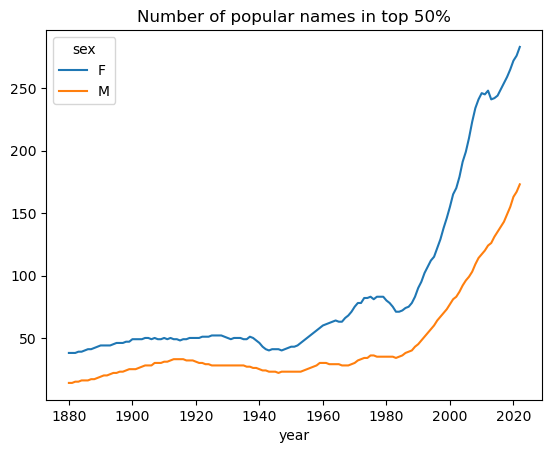

In [93]:
diversity.plot(title='Number of popular names in top 50%')

In [99]:
def get_last_letter(the_name):
    return the_name[-1]

last_letter = names['name'].map(get_last_letter)
last_letter.name = 'last_letter'

table = names.pivot_table('births', index=last_letter, columns=['sex', 'year'], aggfunc=sum)
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691323.0  677323.0    977.0    5217.0   28896.0
b                 NaN     694.0     455.0    411.0    3911.0   39304.0
c                 5.0      49.0     958.0    482.0   15458.0   23364.0
d              6751.0    3731.0    2645.0  22112.0  262131.0   44864.0
e            133599.0  435008.0  317005.0  28665.0  178762.0  130348.0

In [100]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022061.0
     2010    1776636.0
M    1910     194209.0
     1960    2132230.0
     2010    1917792.0
dtype: float64

In [101]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341890  0.381239  0.005031  0.002447  0.015067
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113857  0.122937  0.023394
e            0.336943  0.215131  0.178430  0.147599  0.083838  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000156  0.000377  0.002260  0.009488  0.001406
h            0.051531  0.036220  0.076011  0.045564  0.037914  0.051828
i            0.001526  0.039965  0.031700  0.000844  0.000610  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000356  0.036579  0.049374  0.018531
l            0.043188  0.033871  0.026391  0.065023  0.104888  0.070455
m            0.001200  0.008611  0.002599  0.058046  0.033832  0.024707
n            0.079238  0.130680  0.140044  0.143387  0.152510  0.362404
o            0.001672  0.002440  0.001247  0.017064  0.012840  0.042558
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018045  0.064472  0.031050  0.087390
s            0.039036  0.012762  0.013336  0.130797  0.102699  0.065160
t            0.027432  0.015197  0.007838  0.072885  0.065643  0.022861
u            0.000683  0.000574  0.000416  0.000124  0.000057  0.001227
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007706  0.016183
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152551  0.116753  0.077345  0.161011  0.058207
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

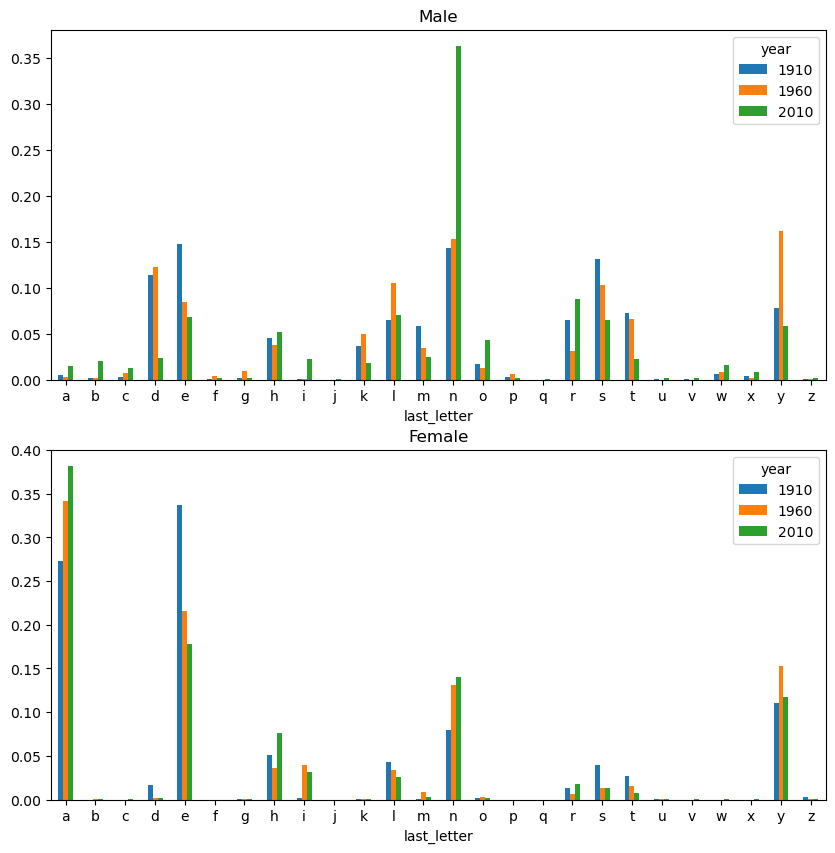

In [105]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1, figsize=(10, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')

In [108]:
letter_prop = table/table.sum()

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

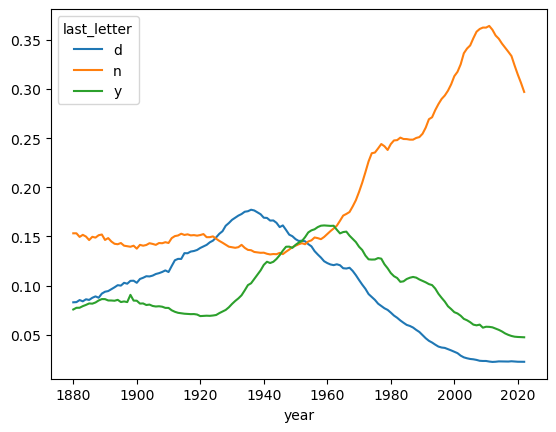

In [109]:
dny_ts.plot()

In [110]:
all_name = pd.Series(top1000['name'].unique())
lesley_like = all_name[all_name.str.contains('Lesl')]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4730     Lesli
6105     Lesly
dtype: object

In [111]:
filtered = top1000[top1000['name'].isin(lesley_like)]
filtered.groupby('name')['births'].sum()

name
Leslee       993
Lesley     35039
Lesli        929
Leslie    380170
Lesly      11434
Name: births, dtype: int64

In [112]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)

table = table.div(table.sum(axis='columns'), axis='index')
table.tail()

sex,F,M
year,,
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN
2022,1.0,NaN


<Axes: xlabel='year'>

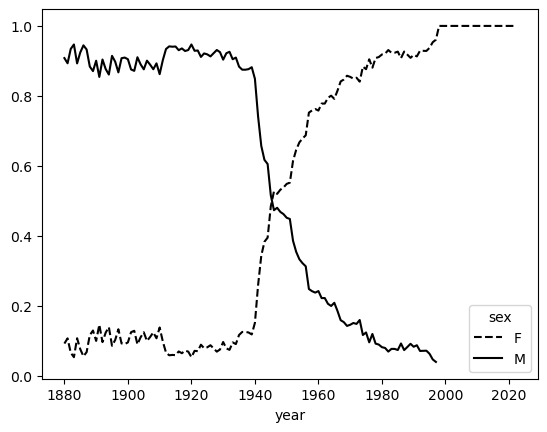

In [113]:
table.plot(style={'M':'k-', 'F':'k--'})